# Para comenzar

Primero quiero mostrarles rápidamente como se ve la solución de la integral (tarea pasada), ademas de la derivada de una función. 

In [1]:
suma(f::Function,x) = sum(f(x))
function ∫(f::Function, a,b,δ=1e-4)
    if a<b
        I = suma(f,a:δ:b)*δ
    else
        I = -suma(f,b:δ:a)*δ
    end
end

∫ (generic function with 2 methods)

In [2]:
derivada(f::Function,x,h=1e-2) =(1/280*f(x-4h)-4/105*f(x-3h)+1/5*f(x-2h)-4/5*f(x-h)+4/5*f(x+h)-1/5*f(x+2h)+4/105*f(x+3h)-1/280*f(x+4h))/h

derivada (generic function with 2 methods)

Como pueden observar, ambas funciones son sumamente fáciles de programarse. Pero soy consciente de que a pesar de verse tan simple el ejercicio, en realidad fue difícil. 

Para demostrarles que, tanto la integral, como la derivada funcionan correctamente, primero haré unas evaluaciones y podrán percatarse que son bastante rápidas evaluando. 

In [3]:
f(x) = sin(x).^3 ./ x.^2 .+ 4x  #noten que uso operaciones vectoriales todo el tiempo. 
@time ∫(f,.0000000001,10)

  0.472740 seconds (552.33 k allocations: 28.177 MB, 0.93% gc time)


200.82874208108822

In [4]:
@time derivada(f,3)

  0.011275 seconds (8.57 k allocations: 411.446 KB)


3.993219970459929

Podríamos sospechar de este método, especialmente, porque el $\delta$ es muy grande. Pero para checar qué tan preciso es, podemos evaluar la integral, luego derivarla, y graficar f(x) y $\frac{d\int f(x) dx}{dx}$, que debería ser simplemente $f(x)$. 

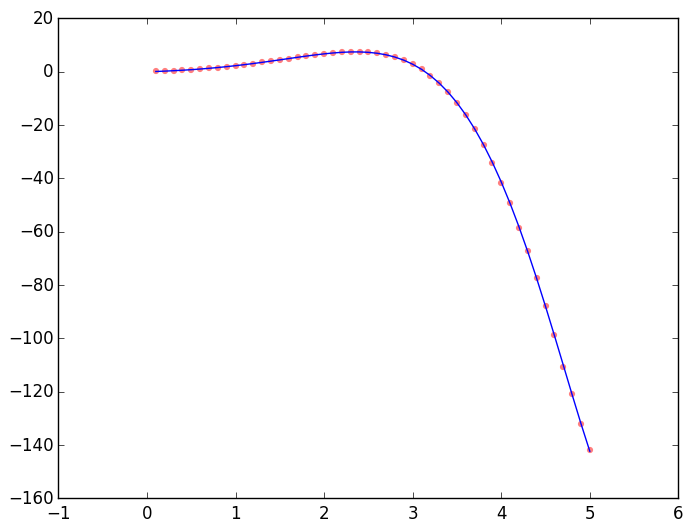

PyObject <matplotlib.collections.PathCollection object at 0x324e9b4d0>

In [5]:
using PyPlot
f(x) = exp(x).*sin(x)
∫f(x) = ∫(f,1,x)
function ∫f2(x)
    integral = []
    for i in x
        push!(integral,∫f(i))
    end
    return integral
end
f2(x) = derivada(∫f2,x)
x = 0.1:.1:5
plot(x,f(x))
scatter(x,f2(x),lw=0, alpha= 0.5, c="red")

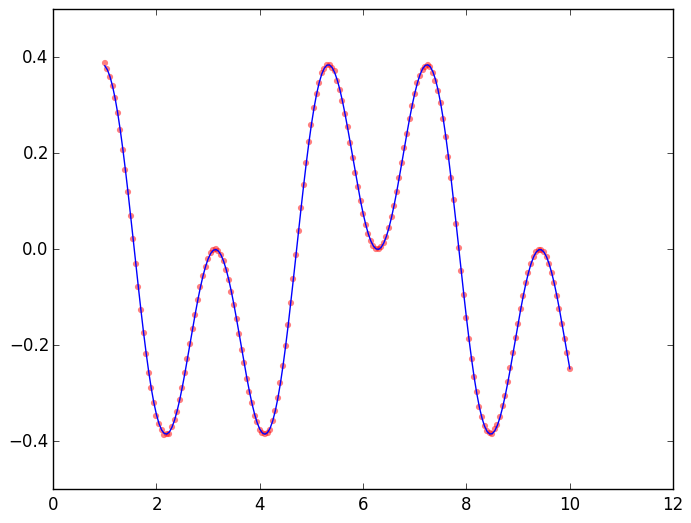

PyObject <matplotlib.collections.PathCollection object at 0x324ed1f50>

In [6]:
f(x) = cos(x).*sin(x).^2 
∫f(x) = ∫(f,1,x)
function ∫f2(x)
    integral = []
    for i in x
        push!(integral,∫f(i))
    end
    return integral
end
f2(x) = derivada(∫f2,x)
x = 1:.05:10
plot(x,f(x))
scatter(x,f2(x),lw=0, alpha= 0.5, c="red")

[0] (este ejercicio es "gratis") Prueba si con otras funciones siempre coincide la fucnion, con la derivada de la integral. ¿Descubres en qué casos la integral falla? 

Ahora voy a comparar el valor de la integral numérica con respecto al valor "exacto". Por ejemplo, con $x^2$ 

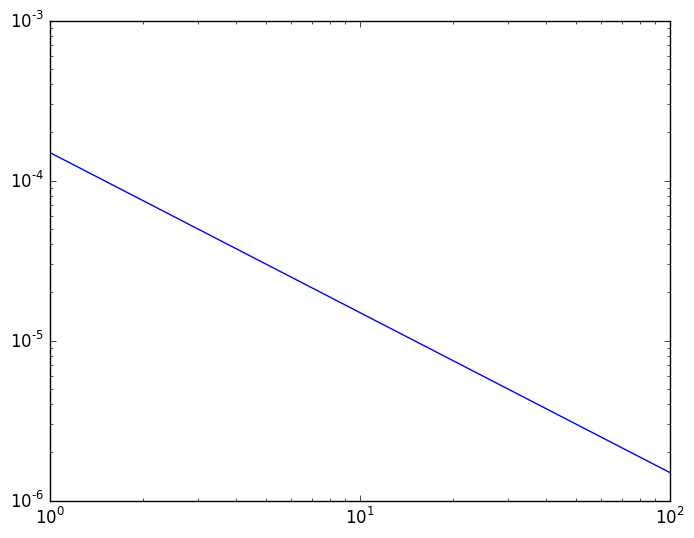

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x325c6de90>

In [7]:
f(x) = x.^2
f2(x) = x.^3 / 3
err = []
for s in 1:100
    Δ = abs(( ∫(f,0,s) - f2(s))/f2(s))
    push!( err, Δ)
end
xscale("log")
yscale("log")
plot(1:100, err)

Qué pasa si reduzco el valor de $\delta$?

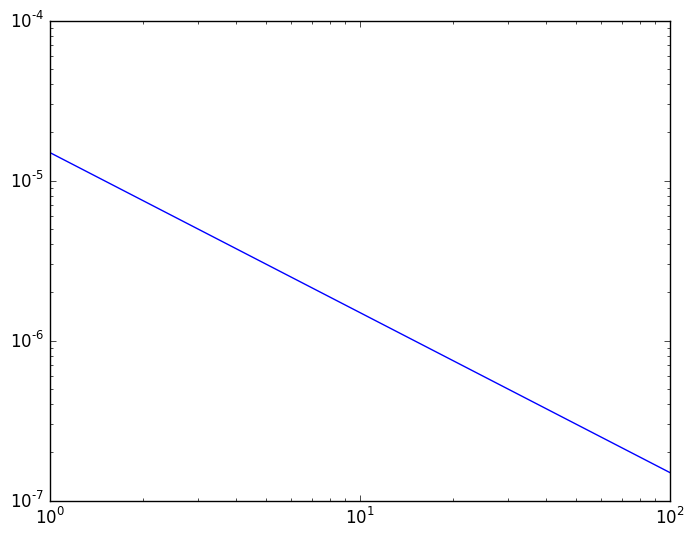

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32503a910>

In [8]:
f(x) = x.^2
f2(x) = x.^3 / 3
err = []
for s in 1:100
    Δ = abs(( ∫(f,0,s,1e-5) - f2(s))/f2(s))
    push!( err, Δ)
end
xscale("log")
yscale("log")
plot(1:100, err)

Como era de esperarse, se reduce el error, pero tarda mucho más en dar el resultado. Qué pasa si reduzco el valor de δ en el caso de la derivada?

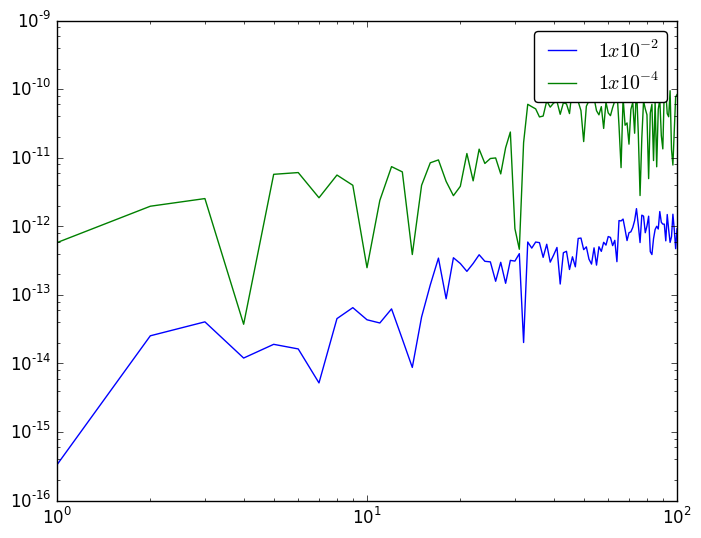

PyObject <matplotlib.legend.Legend object at 0x321fc15d0>

In [9]:
f(x) = x.^2
f2(x) = 2x
err = []
for s in 1:100
    Δ = abs(( derivada(f,s,1e-2) - f2(s))/f2(s))
    push!( err, Δ)
end
xscale("log")
yscale("log")
plot(1:100, err, label=L"1x10^{-2}")
err = []
for s in 1:100
    Δ = abs(( derivada(f,s,1e-4) - f2(s))/f2(s))
    push!( err, Δ)
end
xscale("log")
yscale("log")
plot(1:100, err, label=L"1x10^{-4}")
legend(loc="upper right",fancybox="true")


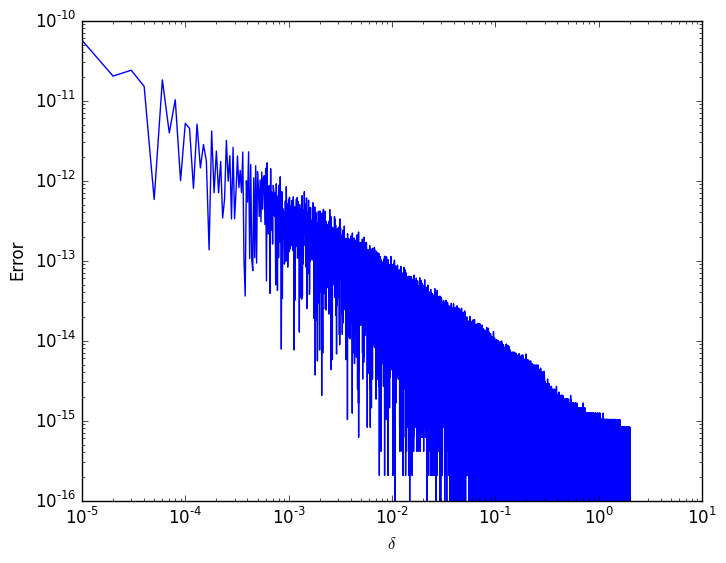

PyObject <matplotlib.text.Text object at 0x325a6d250>

In [10]:
f(x) = x.^2
f2(x) = 2x
err = []
for s in 1e-5:1e-5:2
    Δ = abs(( derivada(f,4.3,s) - f2(4.3))/f2(4.3))
    push!( err, Δ)
end
xscale("log")
yscale("log")
plot(1e-5:1e-5:2, err)
xlabel(L"\delta")
ylabel("Error")

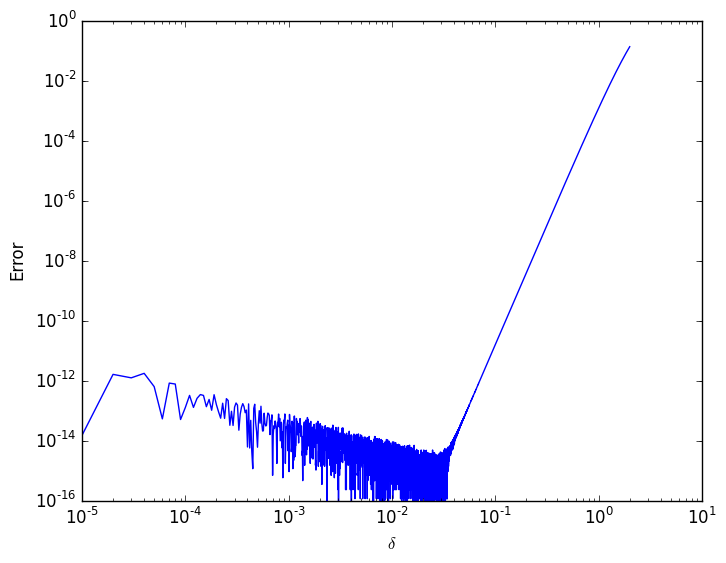

PyObject <matplotlib.text.Text object at 0x3358208d0>

In [11]:
f(x) = sin(x)
f2(x) = cos(x)
err = []
for s in 1e-5:1e-5:2
    Δ = abs(( derivada(f,.3,s) - f2(.3))/f2(.3))
    push!( err, Δ)
end
xscale("log")
yscale("log")
plot(1e-5:1e-5:2, err)
xlabel(L"\delta")
ylabel("Error")

Qué pasó aquí??? 

Lo que sucede es que hay un cierto error debido a la aproximación por h pequeña, pero hay otro error por redondeo. 

Cuando obtenemos la derivada, h divide, por lo que el error debido al redondeo empieza a ser importante cuando h es muy pequeña. Por eso es difícil calcular adecuadamente una derivada. Se debe de buscar el valor óptimo de $\delta$ tal que minimice el error. 

[1] Checa, usando la función de integral que aquí definí, como varia el error, cuando se varía $\delta$. Recuerda que la integral es mucho más lenta que la diferencial, así que no hagas demasiados pasos, o tu programa tardará mucho!!

# Método de Newton!! 

Este método sirve para encontrar los 0's de una función dada. La única condición que se pide, es que sea doblemente diferenciable, y que contenga al menos un cero. 

Para encontrar los ceros, Newton hizo un desarrollo en series de Tylor de la función $f(x)$:

$f(x) \sim f(x_0)+(x-x_0)f'(x_0)+O((x-x_0)^2)$,

entonces, si hacemos $f(x)=0$ (que es lo que queremos obtener) obtenemos:

$x \sim x_0-\frac{f(x_0)}{f'(x_0)}$.

Lo cual es una buena primera aproximación. Iterando esto, tenemos el método de Newton. 

$x_n \sim x_{n-1}-\frac{f(x_{n-1})}{f'(x_{n-1})}$.





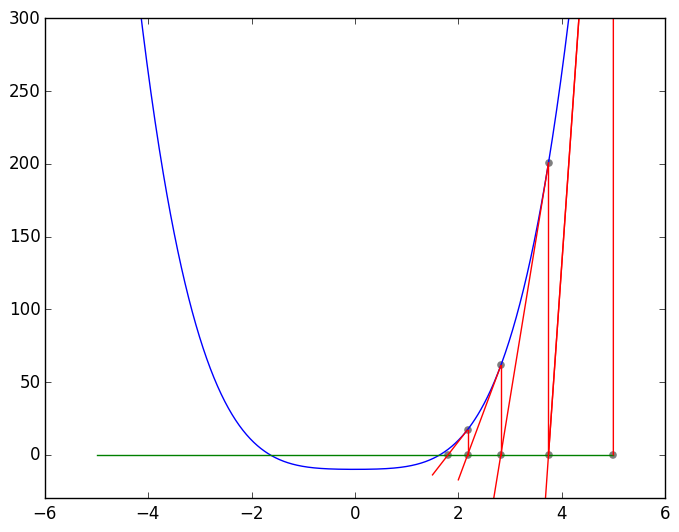

4-element Array{Int64,1}:
  -6
   6
 -30
 300

In [12]:
f(x) = x.^2 .+ x.^4.- 10
df(x) = 2*x .+ 4*x.^3
x = -5:0.01:5
plot(x,f(x))
plot(x,zeros(length(x)))

x0 = 5
m = df(x0)
f2(x) = m.*(x.-x0) .+ f(x0)
x = 3.5:0.01:5
plot(x,f2(x))

x1 = x0-f(x0)/df(x0)
m = df(x1)
f2(x) = m.*(x.-x1) .+ f(x1)
x = 2.5:0.01:x1
plot(x,f2(x), color="red")
plot([x0,x0,x1,x1],[0,f(x0),0,f(x1)], color="red")

x2 = x1-f(x1)/df(x1)
m = df(x2)
f2(x) = m.*(x.-x2) .+ f(x2)
x = 2.:0.01:x2
plot(x,f2(x), color="red")
plot([x2,x2],[0,f(x2)], color="red")

x3 = x2-f(x2)/df(x2)
m = df(x3)
f2(x) = m.*(x.-x3) .+ f(x3)
x = 1.5:0.01:x3
plot(x,f2(x), color="red")
plot([x3,x3],[0,f(x3)], color="red")

x4 = x3-f(x3)/df(x3)
scatter([x0,x0,x1,x1,x2,x2,x3,x3,x4],[0,f(x0),0,f(x1),0,f(x2),0,f(x3),0],c="black",lw=0,s=30,alpha=0.5)
axis([-6,6,-30,300]);

[2] Haz una función de funciones que tenga como argumentos, la función de la que se quieren obtener los ceros, la derivada de esa misma función y una adivinanza y que con ello calcule una mejor aproximación. (Por supuesto, usando lo aprendido en este notebook)

[3] Utiliza esta función para implementar el algoritmo de Newton-Raphson, dada la función, la derivada y una adivinanza. **No olvides poner una condición para terminar tu iteración**

[4] Haz una funcioón de funciones que calcule los ceros de una función, teniendo sólo como argumentos la función de la que se quieren obtener los ceros, y una adivinanza inicial. Utiliza la derivada numérica del inicio de este notebook e implementala en el algoritmo.

[5] Resuelve las ecuaciones "$\cos(x) = e^x $", "$ (\sin(x) - x/2)^2 = 0 $" y "$3x^2 +\tan(x)^2 = 4$" (grafica las funciones y las soluciones de las ecuaciones). 

## El método de Newton para más dimensiones 

El método de Newton también se puede utilizar para encontrar ceros de funciones de varias variables, $\mathbf{f}\colon \mathbb{R}^n \to \mathbb{R}^n$.

[6] Tomando una adivinanza inicial $\mathbf{x}_0$, resuelve aproximadamente la ecuación $\mathbf{f}(\mathbf{x}_0 + \mathbf{\delta x}) = \mathbf{0}$. ¿Qué es lo que cambia con respecto a la versión para una sola variable?

[7] ¿Qué tipo de operaciones computacionales necesitaremos poder implementar?

# Continuará....